In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Installing Packages**

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import numpy as np
from scipy.special import digamma, gammaln
from collections import defaultdict
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from wordcloud import WordCloud
from pandas import DataFrame
from scipy.optimize import minimize

# **Loading Dataset**

In [ ]:
df = pd.read_csv("weather_crowdsrc2.csv")
df

,annotator_id,tweet_id,labels,tweet
0,18939994,82681477,4,Goddamn this weather! Can't run in the rain. O...
1,19028457,82681477,4,Goddamn this weather! Can't run in the rain. O...
2,19982299,82681477,0,Goddamn this weather! Can't run in the rain. O...
3,14584835,82681805,0,40 & rainy is such a letdown after last week's...
4,16738677,82681805,0,40 & rainy is such a letdown after last week's...
...,...,...,...,...
4995,18500901,84321911,0,soo I pressed my way out to bible study in thi...
4996,18939994,84321911,4,soo I pressed my way out to bible study in thi...
4997,19004168,84321911,4,soo I pressed my way out to bible study in thi...
4998,19955339,84321911,1,soo I pressed my way out to bible study in thi...


# **Preprocessing Data**

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphanumeric characters and symbols
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back into sentence
    text = ' '.join(words)
    return text

df['clean_tweet'] = df['tweet'].apply(preprocess_text)
df

,annotator_id,tweet_id,labels,tweet,clean_tweet
0,18939994,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well
1,19028457,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well
2,19982299,82681477,0,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well
3,14584835,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...
4,16738677,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...
...,...,...,...,...,...
4995,18500901,84321911,0,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...
4996,18939994,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...
4997,19004168,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...
4998,19955339,84321911,1,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...


In [ ]:
df['labels'].value_counts()

labels
0    1408
1    1339
2    1105
3     809
4     339
Name: count, dtype: int64

# **Generating Word Clouds for each class**

In [ ]:
# wordcloud for spam and ham messeages
wc= WordCloud(width=500,height=500)

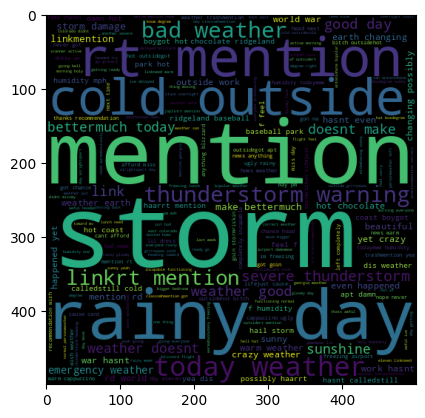

In [ ]:
#negative weather
negative=wc.generate(df[df['labels']==0]['clean_tweet'].str.cat(sep=""))
plt.imshow(negative)

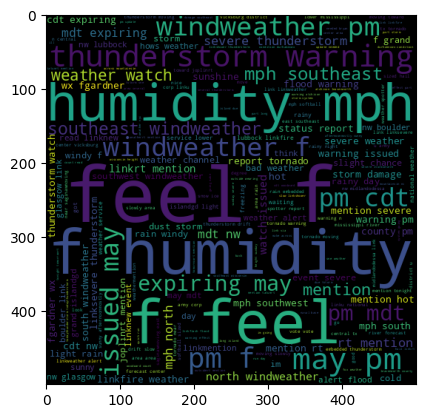

In [ ]:
#neutral weather
neutral=wc.generate(df[df['labels']==1]['clean_tweet'].str.cat(sep=""))
plt.imshow(neutral)

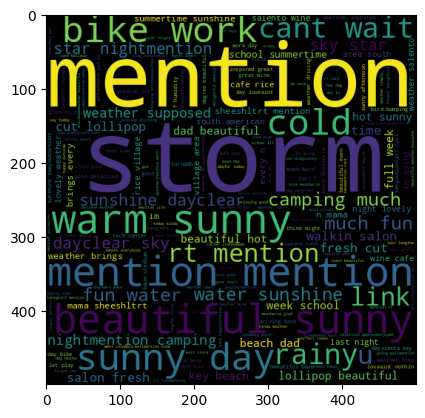

In [ ]:
#positive weather
positive=wc.generate(df[df['labels']==2]['clean_tweet'].str.cat(sep=""))
plt.imshow(positive)

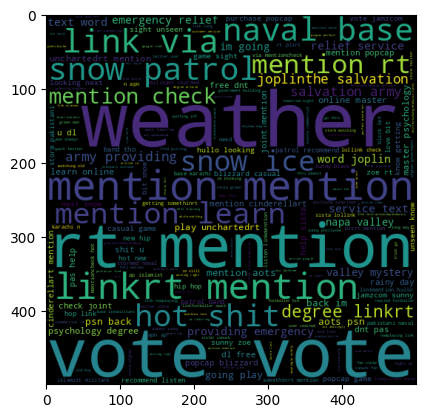

In [ ]:
#not related to weather
not_related=wc.generate(df[df['labels']==3]['clean_tweet'].str.cat(sep=""))
plt.imshow(not_related)

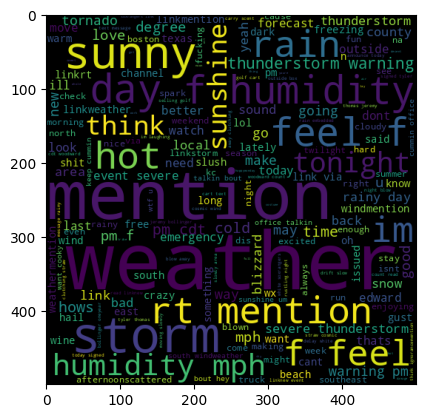

In [ ]:
#cannot tell
ham_wc=wc.generate(df[df['labels']==4]['clean_tweet'].str.cat(sep=""))
plt.imshow(ham_wc)

# **Majority Voting**

In [ ]:
# Counting majority votes for each tweet
def majority_vote(labels):
    vote_count = Counter(labels)
    return vote_count.most_common(1)[0][0]

In [ ]:
# Grouping by tweet_id and applying majority vote
majority_votes = df.groupby('tweet_id')['labels'].apply(majority_vote).reset_index()
majority_votes.columns = ['tweet_id', 'labels_x']
majority_votes

,tweet_id,labels_x
0,82681477,4
1,82681805,0
2,82681854,0
3,82681996,2
4,82682106,2
...,...,...
489,84321548,1
490,84321613,4
491,84321802,1
492,84321854,2


In [ ]:
# Merging with original DataFrame to get tweet text
result_df = pd.merge(majority_votes, df[['tweet_id', 'tweet', 'labels']], on='tweet_id')
result_df

,tweet_id,labels_x,tweet,labels
0,82681477,4,Goddamn this weather! Can't run in the rain. O...,4
1,82681477,4,Goddamn this weather! Can't run in the rain. O...,4
2,82681477,4,Goddamn this weather! Can't run in the rain. O...,0
3,82681805,0,40 & rainy is such a letdown after last week's...,0
4,82681805,0,40 & rainy is such a letdown after last week's...,0
...,...,...,...,...
4995,84321911,0,soo I pressed my way out to bible study in thi...,0
4996,84321911,0,soo I pressed my way out to bible study in thi...,4
4997,84321911,0,soo I pressed my way out to bible study in thi...,4
4998,84321911,0,soo I pressed my way out to bible study in thi...,1


In [ ]:
# Merging with original DataFrame to get tweet text
df1 = pd.merge(majority_votes, df[['annotator_id','tweet_id', 'tweet','clean_tweet', 'labels']], on='tweet_id')
df1

,tweet_id,labels_x,annotator_id,tweet,clean_tweet,labels
0,82681477,4,18939994,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,4
1,82681477,4,19028457,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,4
2,82681477,4,19982299,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,0
3,82681805,0,14584835,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...,0
4,82681805,0,16738677,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...,0
...,...,...,...,...,...,...
4995,84321911,0,18500901,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,0
4996,84321911,0,18939994,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,4
4997,84321911,0,19004168,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,4
4998,84321911,0,19955339,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,1


In [ ]:
# Calculating accuracy
correct_predictions = result_df[result_df['labels_x'] == result_df['labels']]
accuracy_mv = len(correct_predictions) / len(result_df)
print("Accuracy:", accuracy_mv)

Accuracy: 0.607


# **Vote Distribution**

In [ ]:
# Count votes for each label for each tweet
vote_counts = df.groupby(['tweet_id', 'labels']).size().unstack(fill_value=0)

In [ ]:
# Calculate probability of each label for each tweet
total_votes = vote_counts.sum(axis=1)
probabilities = vote_counts.divide(total_votes, axis=0)
probabilities

labels,0,1,2,3,4
tweet_id,,,,,
82681477,0.333333,0.000000,0.000000,0.000000,0.666667
82681805,0.571429,0.142857,0.214286,0.000000,0.071429
82681854,0.636364,0.272727,0.090909,0.000000,0.000000
82681996,0.200000,0.000000,0.400000,0.000000,0.400000
82682106,0.090909,0.000000,0.909091,0.000000,0.000000
...,...,...,...,...,...
84321548,0.222222,0.444444,0.111111,0.000000,0.222222
84321613,0.222222,0.222222,0.000000,0.222222,0.333333
84321802,0.142857,0.428571,0.142857,0.142857,0.142857


In [ ]:
# Assign label with highest probability to each tweet
assigned_labels = probabilities.idxmax(axis=1)
assigned_labels.name = 'assigned_label'

In [ ]:
# Merge assigned labels with original DataFrame
result_df = pd.merge(assigned_labels, df, left_index=True, right_on='tweet_id')
result_df

,assigned_label,annotator_id,tweet_id,labels,tweet,clean_tweet
0,4,18939994,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well
1,4,19028457,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well
2,4,19982299,82681477,0,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well
3,0,14584835,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...
4,0,16738677,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...
...,...,...,...,...,...,...
4995,0,18500901,84321911,0,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...
4996,0,18939994,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...
4997,0,19004168,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...
4998,0,19955339,84321911,1,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...


In [ ]:
# Calculate accuracy
accuracy_vd = (result_df['labels'] == result_df['assigned_label']).mean()

print("Accuracy:", accuracy_vd)

Accuracy: 0.607


# **Bag of Words Classifier + MV**

In [ ]:
X = df['clean_tweet']  # Cleaned text data
y = df['labels'] # Majority vote labels
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a bag-of-words representation of the text data
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(x_train)
X_test_bow = vectorizer.transform(x_test)

In [ ]:
# Train a classifier using the majority vote labels
classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train)

MultinomialNB()

In [ ]:
# Step 6: Evaluate the classifier's accuracy
y_pred = classifier.predict(X_test_bow)
accuracy_bow = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_bow)

Accuracy: 0.522


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

# Initialize SVC classifier
svc = SVC(kernel='rbf', C=2.0, random_state=42)

# Train the SVC classifier
svc.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_SVC = svc.predict(X_test_tfidf)

# Print classification report
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print("Accuracy:", accuracy_SVC)

Accuracy: 0.53


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_tfidf)

# Print classification report
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best model:", accuracy_best)


Best Hyperparameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy with best model: 0.527


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
decision_tree.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_decision_tree = decision_tree.predict(X_test_tfidf)

# Print classification report
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy:", accuracy_decision_tree)


Accuracy: 0.528


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_tfidf)

# Print classification report
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best model:", accuracy_best)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy with best model: 0.53


# **Dawid & Skene**

In [ ]:
# Prepare the data for Dawid & Skene algorithm
n_annotators = df['annotator_id'].nunique()
n_tweets = df['tweet_id'].nunique()
# n_tweets = len(df)
print(n_annotators)
print(n_tweets)

51
494


## Confusion Matrix

In [ ]:

def construct_confusion_matrices(df, classes):
    classes = range(5)
    n_classes = len(classes)
    annotator_ids = df['annotator_id'].unique()
    n_annotators = len(annotator_ids)
    confusion_matrices = {}

    for annotator_id in annotator_ids:
        annotator_data = df[df['annotator_id'] == annotator_id]
        confusion_matrix = np.zeros((n_classes, n_classes))

        for true_label, annotator_label in zip(annotator_data['assigned_label'], annotator_data['labels']):
            confusion_matrix[true_label, annotator_label] += 1

        confusion_matrices[annotator_id] = confusion_matrix

    return confusion_matrices


In [ ]:
classes = range(5)
confusion_matrices = construct_confusion_matrices(result_df,classes)
len(confusion_matrices)
confusion_matrices

{18939994: array([[ 6., 13.,  1.,  2., 12.],
        [ 7., 14.,  3.,  0., 10.],
        [ 0.,  7.,  2.,  3.,  7.],
        [ 3.,  6.,  1.,  3.,  7.],
        [ 0.,  0.,  0.,  1.,  1.]]),
 19028457: array([[48., 10., 66.,  7., 18.],
        [27., 30., 53.,  9., 19.],
        [25., 12., 44.,  8., 12.],
        [24.,  9., 35., 12.,  9.],
        [ 0.,  0.,  1.,  0.,  3.]]),
 19982299: array([[ 9.,  3.,  0.,  0.,  1.],
        [ 0.,  8.,  1.,  0.,  0.],
        [ 0.,  0.,  7.,  0.,  0.],
        [ 0.,  0.,  0., 11.,  0.],
        [ 1.,  0.,  0.,  0.,  0.]]),
 14584835: array([[30.,  1.,  1.,  1.,  2.],
        [ 6., 16.,  0.,  0.,  0.],
        [ 3.,  1., 15.,  0.,  1.],
        [ 5.,  0.,  1., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]),
 16738677: array([[40.,  4.,  1.,  0.,  0.],
        [13., 16.,  4.,  0.,  5.],
        [ 3.,  5., 16.,  0.,  0.],
        [ 1., 15.,  0.,  2.,  1.],
        [ 0.,  0.,  0.,  0.,  1.]]),
 16846915: array([[32.,  5., 18.,  5.,  3.],
        [ 1., 26.,  

In [ ]:
import numpy as np

def calculate_cohens_kappa(confusion_matrix):
  n = np.sum(confusion_matrix)
  sum_po = np.sum(np.diag(confusion_matrix))
  sum_pe = np.sum(confusion_matrix * confusion_matrix) / n

  if sum_pe == 0:
    return 1.0  # Perfect agreement
  else:
    return (sum_po - sum_pe) / (n - sum_pe)

def calculate_kappa_per_annotator(confusion_matrices):

  kappa_scores = {}
  for annotator_id, confusion_matrix in confusion_matrices.items():
    kappa_scores[annotator_id] = calculate_cohens_kappa(confusion_matrix)

  return kappa_scores

# Example usage (assuming you have a confusion matrix dictionary)


kappa_per_annotator = calculate_kappa_per_annotator(confusion_matrices)

print("Kappa scores per annotator:")
for annotator_id, kappa in kappa_per_annotator.items():
  print(f"Annotator {annotator_id}: {kappa:.4f}")


Kappa scores per annotator:
Annotator 18939994: 0.1742
Annotator 19028457: 0.2280
Annotator 19982299: 0.8183
Annotator 14584835: 0.7149
Annotator 16738677: 0.5117
Annotator 16846915: 0.5875
Annotator 17012868: 0.8359
Annotator 17475684: 0.3822
Annotator 17948184: 0.5986
Annotator 18034918: 0.6050
Annotator 18112936: 0.5781
Annotator 18381123: 0.5551
Annotator 18588701: 0.7850
Annotator 19955339: 0.6875
Annotator 14806909: 0.1825
Annotator 14876813: 0.5253
Annotator 18354072: 0.6614
Annotator 18500901: 0.3207
Annotator 19007283: 0.4769
Annotator 19376841: 0.8310
Annotator 19378092: 0.7476
Annotator 19715431: 0.5715
Annotator 16526185: 0.8262
Annotator 16573689: 0.7412
Annotator 18081456: 0.5714
Annotator 15846764: 0.7270
Annotator 16879965: 0.6046
Annotator 18465660: 0.6363
Annotator 16830478: 0.6937
Annotator 17594578: 0.6963
Annotator 19004168: 0.6957
Annotator 15124755: 0.5245
Annotator 16498372: 0.7061
Annotator 18395155: 0.3239
Annotator 14636551: 0.4548
Annotator 15847995: 0.7093


## Implimenting David and Skene Algorithim

In [ ]:

def dawid_skene(confusion_matrices, prior_prob, max_iter=10000, tolerance=1e-10):


    n_tweets = len(confusion_matrices)  # Number of tweets
    classes = range(5)
    n_classes = len(classes)  # Number of classes
    prev_prior_prob = np.zeros(n_classes)

    for iter_num in range(max_iter):
        # E-step: Calculate the posterior probability for each class
        posterior_prob = np.zeros((n_tweets, n_classes))
        for i, confusion_matrix in enumerate(confusion_matrices.values()):
            for j in range(n_classes):
                # Calculate the likelihood for each class
                likelihood = prior_prob[j] * np.prod(confusion_matrix[:, j] ** posterior_prob[i])
                posterior_prob[i][j] = likelihood

        # Normalize the posterior probability
        posterior_prob = posterior_prob / np.sum(posterior_prob, axis=1)[:, np.newaxis]

        # M-step: Update the prior probability
        new_prior_prob = np.sum(posterior_prob, axis=0) / n_tweets

        # Check for convergence
        if np.max(np.abs(new_prior_prob - prev_prior_prob)) < tolerance:
            break

        prev_prior_prob = new_prior_prob.copy()

    return new_prior_prob, posterior_prob



In [ ]:
prior_prob = np.ones(5) / 5
print(prior_prob)

[0.2 0.2 0.2 0.2 0.2]


In [ ]:
# Initialize the prior probability for each class
prior_prob = np.ones(5) / 5

# Apply the Dawid & Skene algorithm
final_prior_prob, posterior_prob = dawid_skene(confusion_matrices, prior_prob)
# Set printing options for NumPy arrays
np.set_printoptions(precision=4, suppress=True)

print("Final Prior Probability of class:")
print(final_prior_prob)

print("\nPosterior Probability for each tweet (Likelyhood of each tweet belongs to particluar class):")
print(posterior_prob)

print("\nPosterior Probability Shape:")
print(posterior_prob.shape)



Final Prior Probability of class:
[0.4324 0.1987 0.1476 0.1082 0.1131]

Posterior Probability for each tweet (Likelyhood of each tweet belongs to particluar class):
[[0.0968 0.1616 0.1397 0.     0.602 ]
 [0.     0.     0.     0.     1.    ]
 [0.4453 0.5547 0.     0.     0.    ]
 [0.5    0.5    0.     0.     0.    ]
 [0.2659 0.3508 0.3833 0.     0.    ]
 [0.0743 0.1025 0.2351 0.5881 0.    ]
 [1.     0.     0.     0.     0.    ]
 [0.0833 0.1192 0.1505 0.     0.647 ]
 [0.1235 0.2291 0.1704 0.477  0.    ]
 [0.1839 0.3314 0.4847 0.     0.    ]
 [0.1742 0.2001 0.2818 0.3439 0.    ]
 [0.1384 0.2311 0.3495 0.     0.281 ]
 [0.5    0.     0.     0.5    0.    ]
 [0.1757 0.3058 0.     0.5185 0.    ]
 [0.     0.     0.     0.0002 0.9998]
 [0.3919 0.     0.6081 0.     0.    ]
 [0.2562 0.     0.338  0.4058 0.    ]
 [0.0864 0.1421 0.2165 0.     0.555 ]
 [0.1881 0.2852 0.5267 0.     0.    ]
 [0.4114 0.5886 0.     0.     0.    ]
 [0.2815 0.     0.2815 0.4369 0.    ]
 [0.0811 0.1119 0.1296 0.1809 0.4964]

In [ ]:
# Assign class labels to tweets based on maximum likelihood
predicted_labels = np.argmax(posterior_prob, axis=1)

# Print the predicted labels
print(predicted_labels)
print(predicted_labels.shape)


[4 4 1 0 2 3 0 4 3 2 3 2 0 3 4 2 3 4 2 1 3 4 3 3 1 1 2 2 0 2 3 1 3 2 2 0 3
 1 0 0 0 0 4 0 0 0 0 0 0 0 0]
(51,)


In [ ]:
predicted_labels_dict = {}  # Dictionary to store predicted labels for each annotator
for i, (annotator_id, _) in enumerate(confusion_matrices.items()):
  predicted_labels_dict[annotator_id] = np.argmax(posterior_prob[i])
predicted_labels_dict

{18939994: 4,
 19028457: 4,
 19982299: 1,
 14584835: 0,
 16738677: 2,
 16846915: 3,
 17012868: 0,
 17475684: 4,
 17948184: 3,
 18034918: 2,
 18112936: 3,
 18381123: 2,
 18588701: 0,
 19955339: 3,
 14806909: 4,
 14876813: 2,
 18354072: 3,
 18500901: 4,
 19007283: 2,
 19376841: 1,
 19378092: 3,
 19715431: 4,
 16526185: 3,
 16573689: 3,
 18081456: 1,
 15846764: 1,
 16879965: 2,
 18465660: 2,
 16830478: 0,
 17594578: 2,
 19004168: 3,
 15124755: 1,
 16498372: 3,
 18395155: 2,
 14636551: 2,
 15847995: 0,
 18806438: 3,
 14655697: 1,
 18927389: 0,
 15549817: 0,
 18975312: 0,
 17381214: 0,
 18804376: 4,
 18439611: 0,
 16554332: 0,
 17179546: 0,
 17899447: 0,
 19415027: 0,
 16378241: 0,
 17652569: 0,
 18914675: 0}

In [ ]:
predicted_labels_df = pd.DataFrame.from_dict(predicted_labels_dict, orient='index', columns=['predicted_label'])

# Reset index to make annotator_id a column
predicted_labels_df.reset_index(inplace=True)
predicted_labels_df.rename(columns={'index': 'annotator_id'}, inplace=True)

# Display the DataFrame
predicted_labels_df

,annotator_id,predicted_label
0,18939994,4
1,19028457,4
2,19982299,1
3,14584835,0
4,16738677,2
5,16846915,3
6,17012868,0
7,17475684,4
8,17948184,3
9,18034918,2


In [ ]:
annotator_label_map = dict(zip(predicted_labels_df['annotator_id'], predicted_labels_df['predicted_label']))
annotator_label_map
result_df['label_David&Skene'] = result_df['annotator_id'].map(annotator_label_map)
result_df

,assigned_label,annotator_id,tweet_id,labels,tweet,clean_tweet,label_David&Skene
0,4,18939994,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,4
1,4,19028457,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,4
2,4,19982299,82681477,0,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,1
3,0,14584835,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...,0
4,0,16738677,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...,2
...,...,...,...,...,...,...,...
4995,0,18500901,84321911,0,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,4
4996,0,18939994,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,4
4997,0,19004168,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,3
4998,0,19955339,84321911,1,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,3


In [ ]:
result_df.isnull().sum()

assigned_label       0
annotator_id         0
tweet_id             0
labels               0
tweet                0
clean_tweet          0
label_David&Skene    0
dtype: int64

In [ ]:
true_labels = result_df['assigned_label'].values
predicted=result_df['label_David&Skene']
accuracy_ds = np.mean(predicted == true_labels)
print("Accuracy:", accuracy_ds)

Accuracy: 0.1592


In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(true_labels, predicted)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[106 100 350 565 474]
 [114  93 323 465 425]
 [ 85  70 230 340 311]
 [ 64  72 172 355 254]
 [  3   1   4  12  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.07      0.11      1595
           1       0.28      0.07      0.11      1420
           2       0.21      0.22      0.22      1036
           3       0.20      0.39      0.27       917
           4       0.01      0.38      0.02        32

    accuracy                           0.16      5000
   macro avg       0.20      0.22      0.14      5000
weighted avg       0.25      0.16      0.16      5000



#### After giving prior belif from the assigned_labels by MV

In [ ]:
prior_prob1 = np.ones(5) / 5

# Apply the Dawid & Skene algorithm
final_prior_prob_1, posterior_prob_1 = dawid_skene(confusion_matrices, prior_prob1)
print("Final Prior Probability of class:")
print(final_prior_prob_1)

predicted_labels_1 = np.argmax(posterior_prob_1, axis=1)
print(predicted_labels_1)

Final Prior Probability of class:
[0.4324 0.1987 0.1476 0.1082 0.1131]
[4 4 1 0 2 3 0 4 3 2 3 2 0 3 4 2 3 4 2 1 3 4 3 3 1 1 2 2 0 2 3 1 3 2 2 0 3
 1 0 0 0 0 4 0 0 0 0 0 0 0 0]


In [ ]:
class_distribution = df['labels'].value_counts(normalize=True)
prior_belief = class_distribution.values
print(prior_belief)
prior_prob_2 = prior_belief

final_prior_prob_2, posterior_prob_2 = dawid_skene(confusion_matrices, prior_prob_2)
print("Final Prior Probability of class after giving prior belief:")
print(final_prior_prob_2)



[0.2816 0.2678 0.221  0.1618 0.0678]


<ipython-input-237-1505abb8c5e8>:15: RuntimeWarning: overflow encountered in power
  likelihood = prior_prob[j] * np.prod(confusion_matrix[:, j] ** posterior_prob[i])
<ipython-input-237-1505abb8c5e8>:19: RuntimeWarning: invalid value encountered in divide
  posterior_prob = posterior_prob / np.sum(posterior_prob, axis=1)[:, np.newaxis]


Final Prior Probability of class after giving prior belief:
[0.448  0.2156 0.1546 0.0982    nan]


In [ ]:
# predicted_labels_1 = np.argmax(posterior_prob_1, axis=1)
# print(predicted_labels_1)
predicted_labels_2 = np.argmax(posterior_prob_2, axis=1)
print(predicted_labels_2)

[4 4 1 0 1 3 0 4 3 2 2 2 0 3 4 2 2 4 2 1 0 4 2 1 1 1 2 2 0 2 0 1 3 2 2 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
predicted_labels_2_dict = {}  # Dictionary to store predicted labels for each annotator
for i, (annotator_id, _) in enumerate(confusion_matrices.items()):
  predicted_labels_2_dict[annotator_id] = np.argmax(posterior_prob_2[i])


In [ ]:
predicted_labels_2_df = pd.DataFrame.from_dict(predicted_labels_2_dict, orient='index', columns=['predicted_label_2'])

# Reset index to make annotator_id a column
predicted_labels_2_df .reset_index(inplace=True)
predicted_labels_2_df .rename(columns={'index': 'annotator_id'}, inplace=True)

# Display the DataFrame
predicted_labels_2_df

,annotator_id,predicted_label_2
0,18939994,4
1,19028457,4
2,19982299,1
3,14584835,0
4,16738677,1
5,16846915,3
6,17012868,0
7,17475684,4
8,17948184,3
9,18034918,2


In [ ]:
annotator_label_map = dict(zip(predicted_labels_2_df ['annotator_id'], predicted_labels_2_df ['predicted_label_2']))
annotator_label_map
result_df['label_David&Skene_prior_dist'] = result_df['annotator_id'].map(annotator_label_map)
result_df

,assigned_label,annotator_id,tweet_id,labels,tweet,clean_tweet,label_David&Skene,label_David&Skene_prior_dist
0,4,18939994,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,4,4
1,4,19028457,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,4,4
2,4,19982299,82681477,0,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,1,1
3,0,14584835,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...,0,0
4,0,16738677,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...,2,1
...,...,...,...,...,...,...,...,...
4995,0,18500901,84321911,0,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,4,4
4996,0,18939994,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,4,4
4997,0,19004168,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,3,0
4998,0,19955339,84321911,1,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,3,3


In [ ]:
true_labels = result_df['assigned_label']
predicted=result_df['label_David&Skene']
accuracy_ds_ep = np.mean(predicted == true_labels)
print("Accuracy by giving equal prior:", accuracy_ds_ep)

Accuracy by giving equal prior: 0.1592


In [ ]:
true_labels = result_df['assigned_label']
predicted=result_df['label_David&Skene_prior_dist']
accuracy_ds_p = np.mean(predicted == true_labels)
print("Accuracy by calculating proportions:", accuracy_ds_p)

Accuracy by calculating proportions: 0.1788


In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
predicted=result_df['label_David&Skene_prior_dist']
conf_matrix = confusion_matrix(true_labels, predicted)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report after giving actual prior:")
print(report)

Confusion Matrix:
[[231 223 447 245 449]
 [222 183 393 209 413]
 [149 141 300 147 299]
 [137 125 241 168 246]
 [  6   2   5   7  12]]

Classification Report after giving actual prior:
              precision    recall  f1-score   support

           0       0.31      0.14      0.20      1595
           1       0.27      0.13      0.17      1420
           2       0.22      0.29      0.25      1036
           3       0.22      0.18      0.20       917
           4       0.01      0.38      0.02        32

    accuracy                           0.18      5000
   macro avg       0.20      0.22      0.17      5000
weighted avg       0.26      0.18      0.20      5000



In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
predicted=result_df['label_David&Skene']
conf_matrix = confusion_matrix(true_labels, predicted)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report after giving even prior:")
print(report)

Confusion Matrix:
[[106 100 350 565 474]
 [114  93 323 465 425]
 [ 85  70 230 340 311]
 [ 64  72 172 355 254]
 [  3   1   4  12  12]]

Classification Report after giving even prior:
              precision    recall  f1-score   support

           0       0.28      0.07      0.11      1595
           1       0.28      0.07      0.11      1420
           2       0.21      0.22      0.22      1036
           3       0.20      0.39      0.27       917
           4       0.01      0.38      0.02        32

    accuracy                           0.16      5000
   macro avg       0.20      0.22      0.14      5000
weighted avg       0.25      0.16      0.16      5000



# **IBCC**

In [ ]:
# Prepare the data for IBCC algorithm
n_annotators = df['annotator_id'].nunique()
n_tweets = len(df)
n_classes = 5  # negative, neutral, positive, not weather-related, cannot tell

In [ ]:
# Initialize prior parameters for confusion matrices
alpha = np.ones((n_annotators, n_classes, n_classes))  # shape: (n_annotators, n_classes, n_classes)
for i in range(n_annotators):
    alpha[i, :, :] *= 0.1  # Initial alpha values, can be adjusted based on prior knowledge

In [ ]:
# Prepare data
annotator_ids = df['annotator_id'].values
labels = df['labels'].values

In [ ]:
# Function to compute the expected likelihood
def compute_expected_likelihood(theta, annotator_ids, labels):
    expected_likelihood = np.zeros((n_tweets, n_classes))
    for i in range(n_tweets):
        for c in range(n_classes):
            sum_term = 0
            for j in range(n_annotators):
                sum_term += theta[j * n_classes + c] * alpha[j, c, labels[i]]
            expected_likelihood[i, c] = sum_term
    return expected_likelihood

In [ ]:
# Function to compute the evidence lower bound (ELBO)
def compute_elbo(theta, annotator_ids, labels):
    elbo = 0
    for i in range(n_tweets):
        for c in range(n_classes):
            sum_term = 0
            for j in range(n_annotators):
                sum_term += theta[j * n_classes + c] * alpha[j, c, labels[i]]
            elbo += np.log(sum_term)
    return elbo

In [ ]:
# Function to minimize negative ELBO
def neg_elbo(theta, annotator_ids, labels):
    return -compute_elbo(theta, annotator_ids, labels)

In [ ]:
# Step 3: Implement the IBCC algorithm using variational Bayes (VB)
# Initialize theta parameters
theta_init = np.random.rand(n_annotators * n_classes)
theta_init /= np.sum(theta_init)  # Normalize theta values

In [ ]:
# Minimize negative ELBO to find optimal theta parameters
res = minimize(neg_elbo, theta_init, args=(annotator_ids, labels), method='Nelder-Mead',options={'maxiter': 1})
theta_optimal_nelder = res.x

In [ ]:
# Minimize negative ELBO to find optimal theta parameters
res = minimize(neg_elbo, theta_init, args=(annotator_ids, labels), method='L-BFGS-B',options={'maxiter': 1})
theta_optimal_Lbfgs = res.x

In [ ]:
# Step 4: Evaluate the accuracy of the model
# Get predicted labels based on the majority vote of optimized theta parameters
predicted_labels = np.argmax(compute_expected_likelihood(theta_optimal_nelder, annotator_ids, labels), axis=1)
true_labels = result_df['assigned_label'].values
accuracy_nm = np.mean(predicted_labels == true_labels)
print("Accuracy by using Nelder-Mead:", accuracy_nm)

Accuracy by using Nelder-Mead: 0.0064


In [ ]:
# Step 4: Evaluate the accuracy of the model
# Get predicted labels based on the majority vote of optimized theta parameters
predicted_labels = np.argmax(compute_expected_likelihood(theta_optimal_Lbfgs, annotator_ids, labels), axis=1)
true_labels = result_df['assigned_label'].values
accuracy_ibcc_lbfgs = np.mean(predicted_labels == true_labels)
print("Accuracy by using Lbfgs:", accuracy_ibcc_lbfgs)

Accuracy by using Lbfgs: 0.284


In [ ]:
labels_IBCC_Nelder = np.argmax(compute_expected_likelihood(theta_optimal_nelder, annotator_ids, labels), axis=1)
labels_IBCC_Nelder

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
print(labels_IBCC_Nelder)

[4 4 4 ... 4 4 4]


In [ ]:
result_df['predicted_label_IBCC'] = labels_IBCC_Nelder

result_df

,assigned_label,annotator_id,tweet_id,labels,tweet,clean_tweet,label_David&Skene,label_David&Skene_prior_dist,predicted_label_IBCC
0,4,18939994,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,4,4,4
1,4,19028457,82681477,4,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,4,4,4
2,4,19982299,82681477,0,Goddamn this weather! Can't run in the rain. O...,goddamn weather cant run rain oh well,1,1,4
3,0,14584835,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...,0,0,4
4,0,16738677,82681805,0,40 & rainy is such a letdown after last week's...,rainy letdown last week weather good day move ...,2,1,4
...,...,...,...,...,...,...,...,...,...
4995,0,18500901,84321911,0,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,4,4,4
4996,0,18939994,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,4,4,4
4997,0,19004168,84321911,4,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,3,0,4
4998,0,19955339,84321911,1,soo I pressed my way out to bible study in thi...,soo pressed way bible study weather truly sacr...,3,3,4


# **BCCWords - VB Algorithm**

In [ ]:
# Assign unique integer indices to annotators starting from 0
annotator_ids = df1['annotator_id'].unique()
annotator_id_map = {annotator_id: i for i, annotator_id in enumerate(annotator_ids)}
df1['annotator_id'] = df1['annotator_id'].map(annotator_id_map)

# Prepare data
num_annotators = len(df1['annotator_id'].unique())
num_classes = len(df1['labels'].unique())
num_words = sum(df1['clean_tweet'].str.split().apply(len))
num_documents = len(df1)

In [ ]:
# Update true class predictions
def update_class_predictions(bcc_model):
    doc_class_probs = np.zeros((num_documents, bcc_model.num_classes))
    for c in range(bcc_model.num_classes):
        class_word_probs = np.zeros((num_documents, bcc_model.num_words))
        for i, tweet in enumerate(df1['clean_tweet']):
            for word in tweet.split():
                if word in bcc_model.word_distributions[c]:
                    class_word_probs[i, bcc_model.word_distributions[c][word]] += 1
        doc_class_probs[:, c] = np.sum(np.log(class_word_probs + 1), axis=1)
    bcc_model.true_class_predictions = np.argmax(doc_class_probs, axis=1)

In [ ]:
# Update confusion matrices
def update_confusion_matrices(bcc_model):
    confusion_matrices = np.ones((num_annotators, num_classes, num_classes))
    for i, row in df1.iterrows():
        true_class = row['labels_x']
        annotator_id = row['annotator_id']
        confusion_matrices[annotator_id, true_class, bcc_model.true_class_predictions[i]] += 1
    bcc_model.confusion_matrices = confusion_matrices

In [ ]:
# Update word distributions
def update_word_distributions(bcc_model):
    word_distributions = defaultdict(lambda: defaultdict(int))
    for i, row in df1.iterrows():
        doc_words = row['clean_tweet'].split()
        true_class = row['labels_x']
        for word in doc_words:
            bcc_model.word_distributions[true_class][word] += 1

In [ ]:
# Update class proportions
def update_class_proportions(bcc_model):
    class_proportions = np.zeros(bcc_model.num_classes)
    for c in range(bcc_model.num_classes):
        class_proportions[c] = np.sum(bcc_model.true_class_predictions == c)
    bcc_model.class_proportions = class_proportions / num_documents

In [ ]:
# Implement the variational Bayesian inference algorithm
def run_inference(bcc_model, max_iter=100, tol=1e-5):
    for i in range(max_iter):
        old_confusion_matrices = bcc_model.confusion_matrices.copy()

        # Update parameters
        update_class_predictions(bcc_model)
        update_confusion_matrices(bcc_model)
        update_word_distributions(bcc_model)
        update_class_proportions(bcc_model)

        # Check convergence
        if np.allclose(old_confusion_matrices, bcc_model.confusion_matrices, atol=tol):
            break

In [ ]:
# Predict labels for documents
def predict_labels(bcc_model):
    predicted_labels = []
    for i, tweet in enumerate(df1['clean_tweet']):
        doc_class_probs = np.zeros(bcc_model.num_classes)
        for c in range(bcc_model.num_classes):
            class_word_probs = np.zeros(bcc_model.num_words)
            for word in tweet.split():
                if word in bcc_model.word_distributions[c]:
                    class_word_probs[bcc_model.word_distributions[c][word]] += 1
            doc_class_probs[c] = np.sum(np.log(class_word_probs + 1)) + np.log(bcc_model.class_proportions[c])
        predicted_labels.append(np.argmax(doc_class_probs))
    return predicted_labels

In [ ]:

# Evaluate accuracy
def calculate_accuracy(true_labels, predicted_labels):
    correct = sum(true_labels == predicted_labels)
    total = len(true_labels)
    return correct / total

In [ ]:
# Define BCCWords model
class BCCWordsModel:
    def __init__(self, df, num_annotators, num_classes, num_words):
        self.num_annotators = num_annotators
        self.num_classes = num_classes
        self.num_words = num_words
        self.num_documents = len(df1)
        self.confusion_matrices = np.ones((num_annotators, num_classes, num_classes))
        self.word_distributions = defaultdict(lambda: defaultdict(int))
        self.class_proportions = np.ones(num_classes)
        self.true_class_predictions = np.zeros(num_documents, dtype=int)

In [ ]:
# initiating the function of BCCWord model:
bcc_model = BCCWordsModel(df1, num_annotators, num_classes, num_words)
run_inference(bcc_model)

In [ ]:
predicted_labels = predict_labels(bcc_model)
accuracy_bccw = calculate_accuracy(df1['labels_x'], predicted_labels)
print("Accuracy:", accuracy_bccw)

<ipython-input-277-76123ff2b8a2>:11: RuntimeWarning: divide by zero encountered in log
  doc_class_probs[c] = np.sum(np.log(class_word_probs + 1)) + np.log(bcc_model.class_proportions[c])


Accuracy: 0.8978


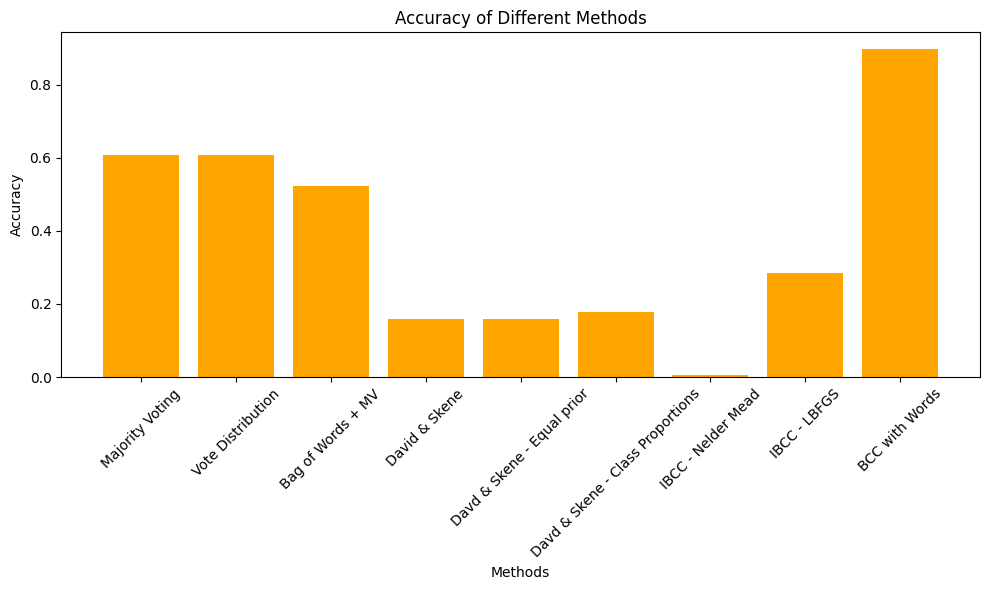

In [ ]:
accuracy_values = [accuracy_mv, accuracy_vd, accuracy_bow, accuracy_ds, accuracy_ds_ep, accuracy_ds_p, accuracy_nm, accuracy_ibcc_lbfgs, accuracy_bccw]
method_names = ['Majority Voting', 'Vote Distribution', 'Bag of Words + MV', 'David & Skene', 'Davd & Skene - Equal prior', 'Davd & Skene - Class Proportions', 'IBCC - Nelder Mead', 'IBCC - LBFGS', 'BCC with Words']

plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary

plt.bar(method_names, accuracy_values, color='orange')

plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Methods')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()